# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Read the cleaned version of the marketing_customer_analysis.csv from the previous lab
marketing_customer_df_clean = pd.read_csv(r"C:\Users\priya\Documents\Week_1\Day_4\Morning\lab-dw-data-structuring-and-combining\marketing_customer_analysis_clean.csv")
marketing_customer_df_clean

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medium,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medium,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medium,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medium,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medium,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury,Medium,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medium,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury,Medium,A,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medium,A,2


In [5]:
#1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.
df = marketing_customer_df_clean[(marketing_customer_df_clean['total_claim_amount']>1000) & (marketing_customer_df_clean['response'] == 'Yes')]
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
189,OK31456,California,11009.130490,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury,Medium,A,1
236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury,Medium,A,1
419,GW43195,Oregon,25807.063000,Yes,Extended,College,2011-02-13,Employed,F,71210,...,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury,Small,A,2
442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2011-02-13,Disabled,F,16181,...,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medium,A,2
587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,2011-01-26,Unemployed,M,0,...,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medium,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,FN44127,Oregon,3508.569533,Yes,Extended,College,2011-01-05,Medical Leave,M,20978,...,1,Personal Auto,Personal L2,Offer2,Branch,1176.278800,Four-Door Car,Small,A,1
10373,XZ64172,Oregon,10963.957230,Yes,Premium,High School or Below,2011-02-08,Employed,M,55687,...,1,Corporate Auto,Corporate L2,Offer1,Agent,1324.800000,Luxury,Medium,A,2
10487,IX60941,Oregon,3508.569533,Yes,Extended,College,2011-01-05,Medical Leave,M,20978,...,1,Personal Auto,Personal L3,Offer2,Branch,1176.278800,Four-Door Car,Small,A,1
10565,QO62792,Oregon,7840.165778,Yes,Extended,College,2011-01-14,Employed,M,58414,...,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,Four-Door Car,Medium,A,1


In [6]:
#2.Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.
marketing_customer_df_clean[marketing_customer_df_clean['response'] == 'Yes'].groupby(['policy_type','gender']).agg({'total_claim_amount': 'mean'})


# conclusions- There is no big difference in total_claim_amount between female and male among three types of policy

total_claim_amount
policy_type    gender                    
Corporate Auto F               433.738499
               M               408.582459
Personal Auto  F               452.965929
               M               457.010178
Special Auto   F               453.280164
               M               429.527942

In [7]:
#3.Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.
state_counts = marketing_customer_df_clean['state'].value_counts()
state_counts
# Filter the results for states with more than 500 customers
filtered_states = state_counts[state_counts > 500]
display(filtered_states)

state
California    4183
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: count, dtype: int64

In [8]:
#4.Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.
# Group the data by education level and gender, and calculate the maximum, minimum, and median customer lifetime value
summary_stats = marketing_customer_df_clean.groupby(['education', 'gender'])['customer_lifetime_value'].agg(['max', 'min', 'median'])

# Display the summary statistics
display(summary_stats)

# conclusion:
# 1. There is no big difference of median value of customer_lifetime_value between gender M/F
# 2. I observed a huge range between max and min value of customer_lifetime_value.
# 3. Distribution of this customer_lifetime_value data is skewed, and the max values in each group are rather a refection of potential outliers

max          min       median
education            gender                                       
Bachelor             F       73225.95652  1904.000852  5640.505303
                     M       67907.27050  1898.007675  5548.031892
College              F       61850.18803  1898.683686  5623.611187
                     M       61134.68307  1918.119700  6005.847375
Doctor               F       44856.11397  2395.570000  5332.462694
                     M       32677.34284  2267.604038  5577.669457
High School or Below F       55277.44589  2144.921535  6039.553187
                     M       83325.38119  1940.981221  6286.731006
Master               F       51016.06704  2417.777032  5729.855012
                     M       50568.25912  2272.307310  5579.099207

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [9]:
policies = pd.pivot_table(marketing_customer_df_clean, index = ['state', 'month'], values = 'policy', aggfunc= 'count')
policies = policies.reset_index()
# Display 
display(policies)

pd.pivot(policies,index = 'state',columns = 'month',  values = 'policy')

,state,month,policy
0,Arizona,1,1008
1,Arizona,2,929
2,California,1,2231
3,California,2,1952
4,Nevada,1,551
5,Nevada,2,442
6,Oregon,1,1565
7,Oregon,2,1344
8,Washington,1,463
9,Washington,2,425


month,1,2
state,,
Arizona,1008,929
California,2231,1952
Nevada,551,442
Oregon,1565,1344
Washington,463,425


6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

In [10]:
# Group the data by state and month, and count the number of policies sold
grouped_data = marketing_customer_df_clean.groupby(['state', 'month']).size().reset_index(name='number_of_Policies')

# Sort the data by the count of policies sold in descending order
sorted_data = grouped_data.sort_values('number_of_Policies', ascending=False)

# Select the top 3 states with the highest number of policies sold
top_3_states = sorted_data['state'].head(3).tolist()

# Create a new DataFrame that contains the number of policies sold by month for each of the top 3 states
new_df = sorted_data[sorted_data['state'].isin(top_3_states)]

# Display the new DataFrame
display(new_df)

,state,month,number_of_Policies
2,California,1,2231
3,California,2,1952
6,Oregon,1,1565
7,Oregon,2,1344


7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

In [11]:
response = marketing_customer_df_clean.pivot_table(index = 'sales_channel', columns = 'response', values ='customer', aggfunc = {'response': 'count'} )
display(response)
#response = response.reset
display(response.index)
response['yes_rate'] = round((response['Yes']*100/(response['Yes']+response['No'])),2)
response

# Based on yes_rate, agent channel has the highest yes_rate 


response,No,Yes
sales_channel,,
Agent,3379,742
Branch,2696,326
Call Center,1920,221
Web,1449,177


Index(['Agent', 'Branch', 'Call Center', 'Web'], dtype='object', name='sales_channel')

response,No,Yes,yes_rate
sales_channel,,,
Agent,3379,742,18.01
Branch,2696,326,10.79
Call Center,1920,221,10.32
Web,1449,177,10.89


External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

# EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
**Show DataFrame info.
Describe DataFrame.
Show a plot of the total number of responses.
Show a plot of the response rate by the sales channel.
Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.

In [12]:
#Show DataFrame info.
marketing_customer_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employment_status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [14]:
#Describe DataFrame.
marketing_customer_df_clean.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.140422,48.091934,0.361962,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.783582,27.940675,0.890134,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


<Axes: xlabel='response', ylabel='count'>

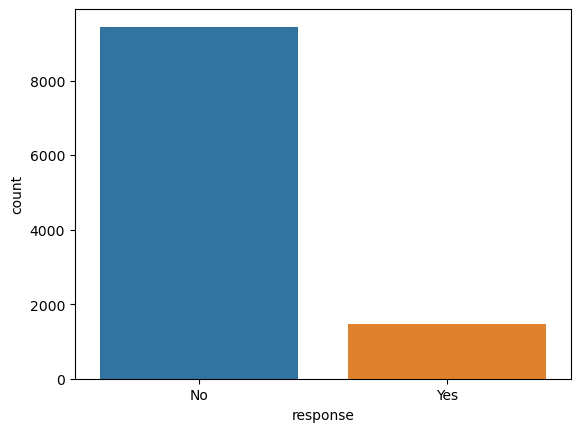

In [15]:
#Show a plot of the total number of responses.
fig, ax = plt.subplots()
sns.countplot (data = marketing_customer_df_clean, x = 'response')

customer
sales_channel response          
Agent         No            3379
              Yes            742
Branch        No            2696
              Yes            326
Call Center   No            1920
              Yes            221
Web           No            1449
              Yes            177

,sales_channel,response,customer
0,Agent,No,3379
1,Agent,Yes,742
2,Branch,No,2696
3,Branch,Yes,326
4,Call Center,No,1920
5,Call Center,Yes,221
6,Web,No,1449
7,Web,Yes,177


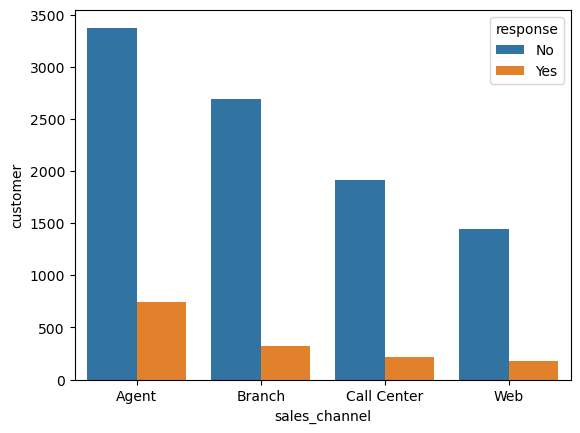

In [17]:
#Show a plot of the response rate by the sales channel.
# Calculate the response rate by sales channel
response_rate = marketing_customer_df_clean.groupby(['sales_channel', 'response']).agg({'customer':'count'})
display (response_rate)

response_rate = response_rate.reset_index()
display (response_rate)


# Show a plot of the response rate by the sales channel.
fig, ax = plt.subplots()
sns.barplot (data = response_rate , x = 'sales_channel', y =  'customer', hue = 'response')
plt.show()

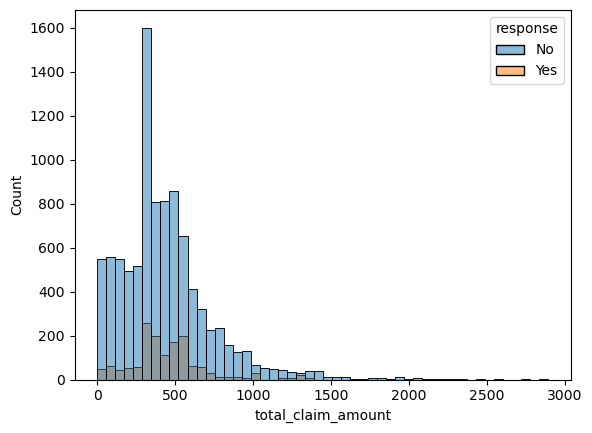

In [18]:
#Show a plot of the response rate by the total claim amount.
sns.histplot(marketing_customer_df_clean,x = 'total_claim_amount', hue = 'response', bins = 50)
plt.show()

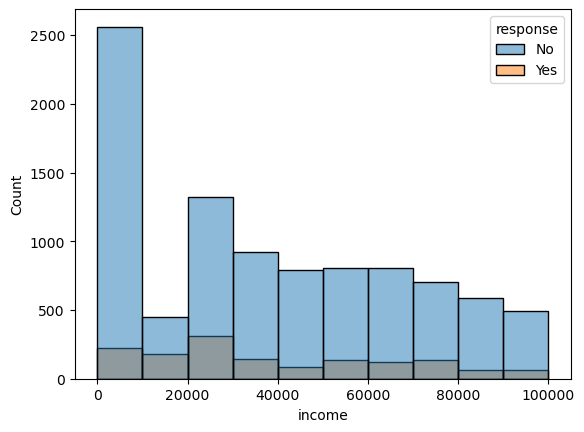

In [19]:
#Show a plot of the response rate by income.
sns.histplot(marketing_customer_df_clean,x = 'income', hue = 'response', bins = 10)
plt.show()